In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data_cleaned.csv")
df.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,python_yn,R_yn,Spark_yn,AWS_yn,Excel_yn,Tableau_yn,Tensorflow_yn,Matlab_yn,Scikit_yn,Sas_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,1,0,0,0,1,1,0,1,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,1,0,0,0,0,0,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,0,1,0,1,0,0,0,0,1


In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'mean_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python', 'python_yn', 'R_yn', 'Spark_yn', 'AWS_yn', 'Excel_yn',
       'Tableau_yn', 'Tensorflow_yn', 'Matlab_yn', 'Scikit_yn', 'Sas_yn'],
      dtype='object')

In [4]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title

In [5]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [6]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: job_simp, dtype: int64

In [7]:
df['seniority'] = df['Job Title'].apply(seniority)

In [8]:
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [9]:
#Fix state LA
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
#df.job_state.value_counts()

In [10]:
# Job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))


In [11]:
#Competitor count
df['Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [12]:
df['Competitors']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: Competitors, Length: 742, dtype: int64

In [13]:
#hourle wage to anual
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary,axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary,axis=1)

df[df.hourly==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [14]:
#Remove the "\n" from the text
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n',' '))
df['company_txt']

0                          Tecolote Research 
1      University of Maryland Medical System 
2                                    KnowBe4 
3                                       PNNL 
4                         Affinity Solutions 
                        ...                  
737                                      GSK 
738                               Eventbrite 
739           Software Engineering Institute 
740                             Numeric, LLC 
741             Riverside Research Institute 
Name: company_txt, Length: 742, dtype: object

<AxesSubplot:>

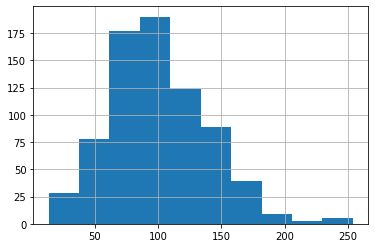

In [15]:
df.mean_salary.hist()

<AxesSubplot:>

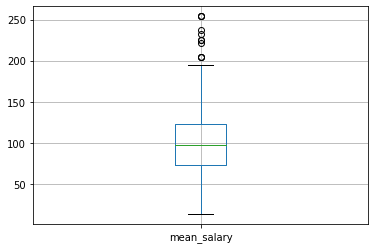

In [16]:
df.boxplot(column='mean_salary')

<AxesSubplot:>

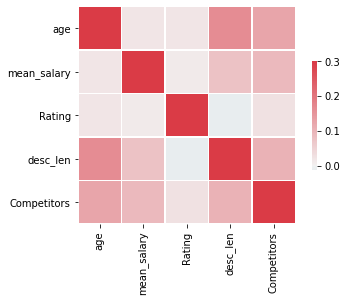

In [17]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
corr = df[['age','mean_salary','Rating','desc_len','Competitors']].corr()
sns.heatmap(corr, vmax=.3,center=0,cmap=cmap,square=True,
            linewidths=.5,cbar_kws={"shrink":.5})

In [18]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'mean_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python', 'python_yn', 'R_yn', 'Spark_yn', 'AWS_yn', 'Excel_yn',
       'Tableau_yn', 'Tensorflow_yn', 'Matlab_yn', 'Scikit_yn', 'Sas_yn',
       'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [19]:
#categoricals 
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state','same_state', 'python_yn', 'R_yn',
       'Spark_yn', 'AWS_yn', 'Excel_yn', 'Tableau_yn','Tensorflow_yn','Matlab_yn','Scikit_yn','Sas_yn','job_simp', 'seniority']]

graph for Location: total = 200


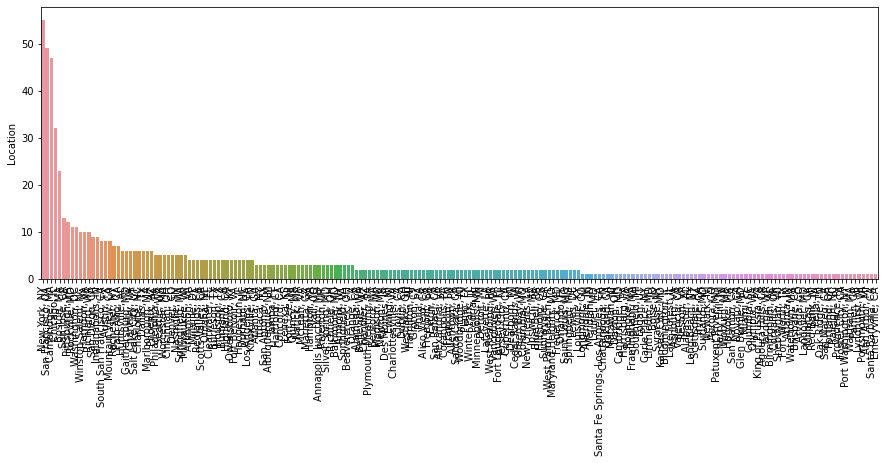

graph for Headquarters: total = 198


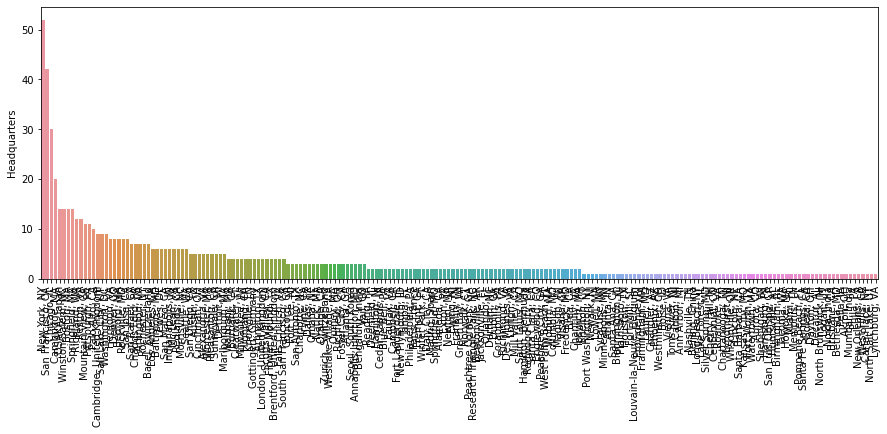

graph for Size: total = 9


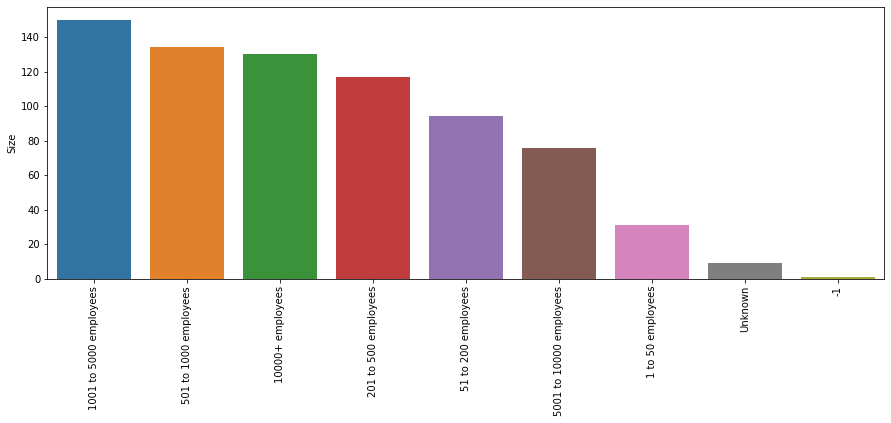

graph for Type of ownership: total = 11


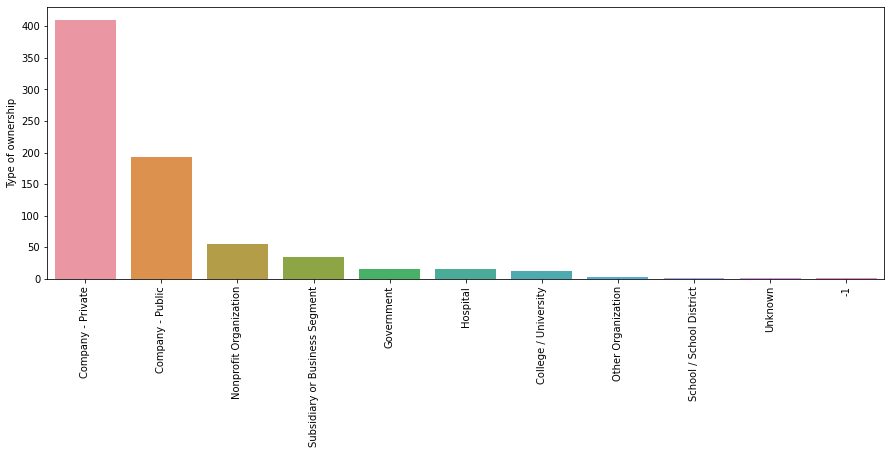

graph for Industry: total = 60


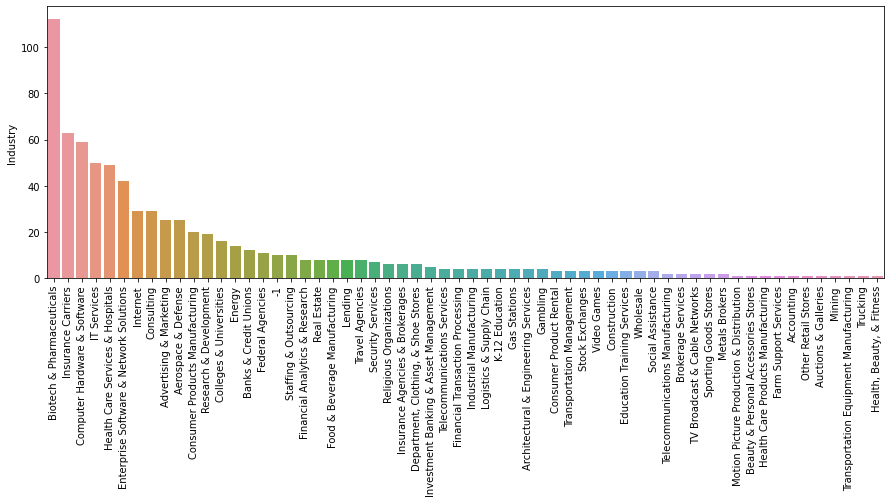

graph for Sector: total = 25


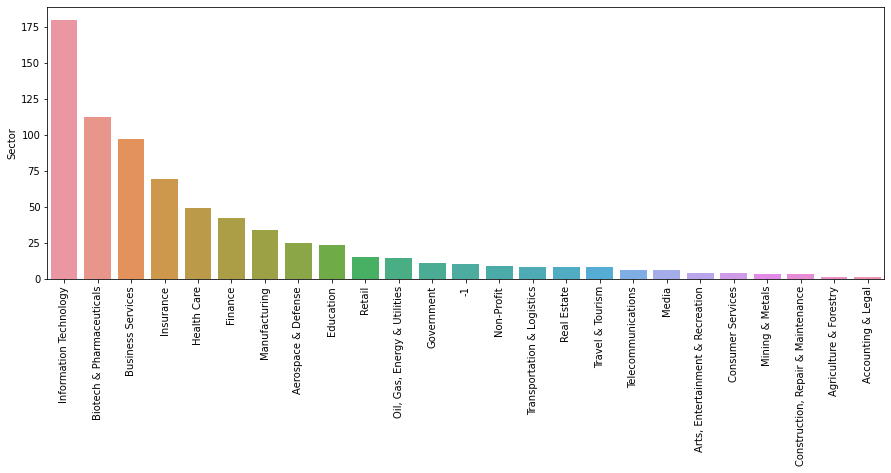

graph for Revenue: total = 14


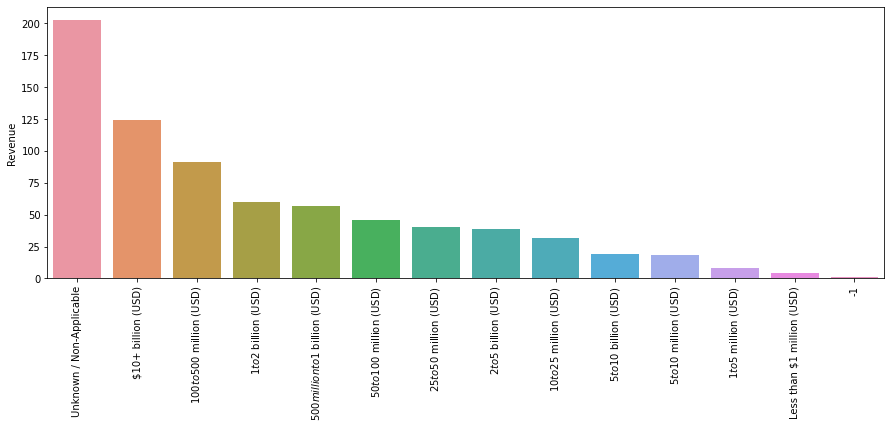

graph for company_txt: total = 343


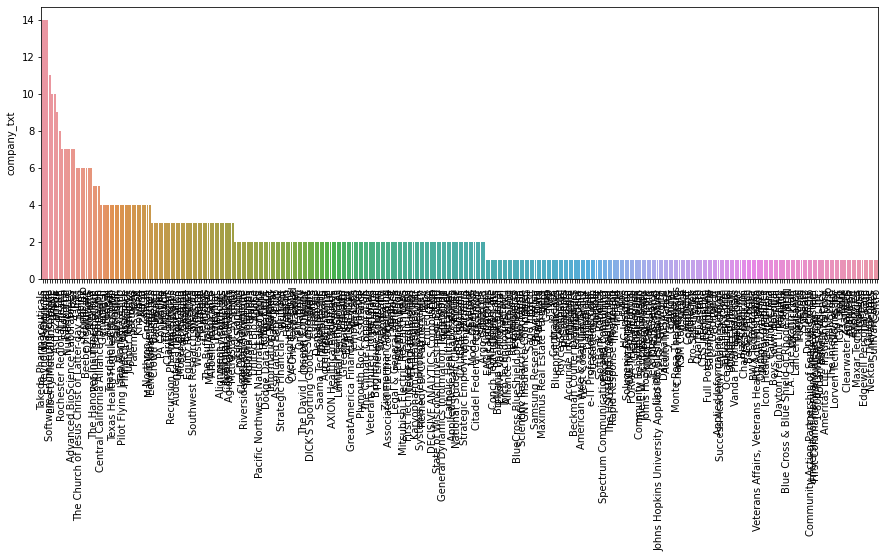

graph for job_state: total = 37


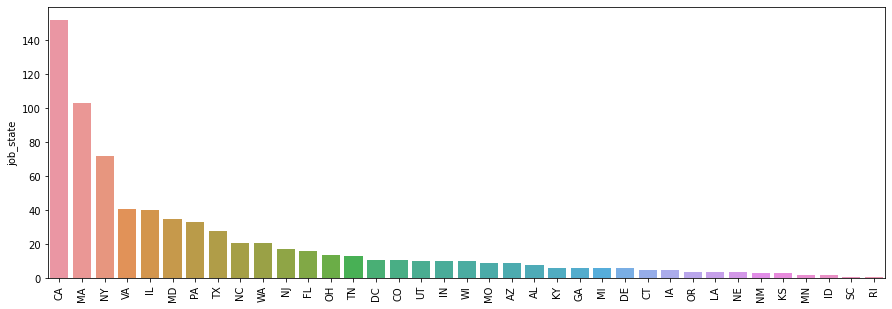

graph for same_state: total = 2


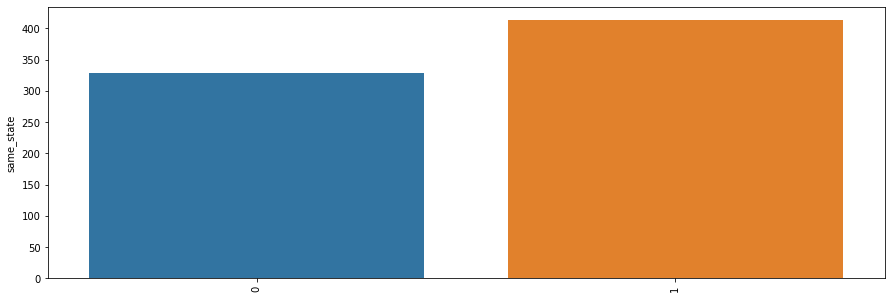

graph for python_yn: total = 2


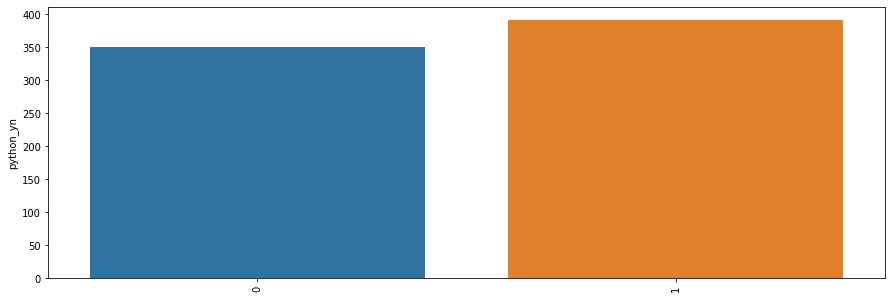

graph for R_yn: total = 2


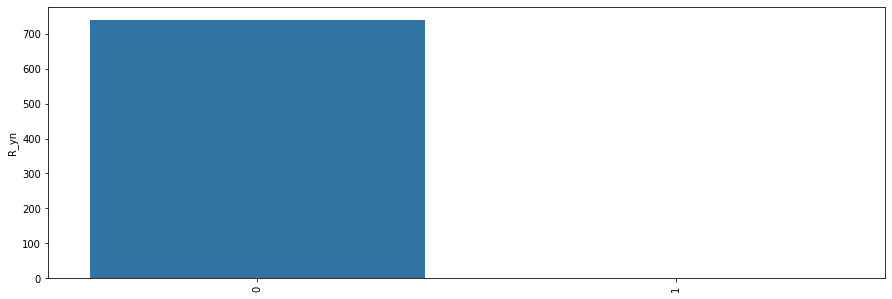

graph for Spark_yn: total = 2


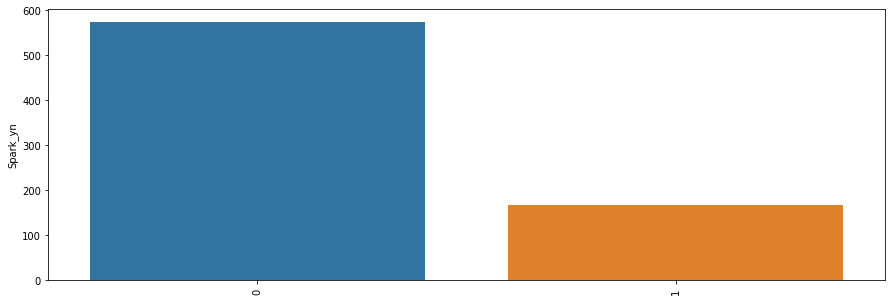

graph for AWS_yn: total = 2


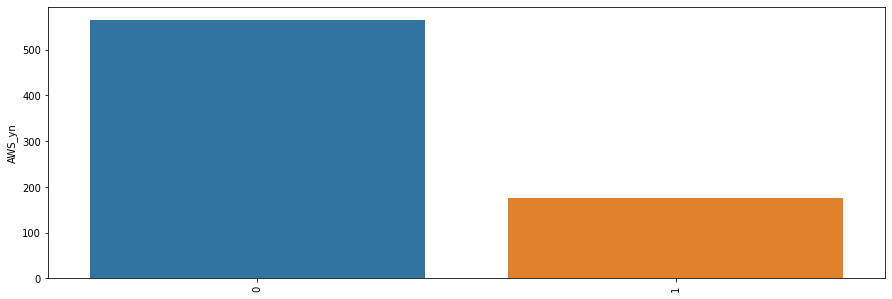

graph for Excel_yn: total = 2


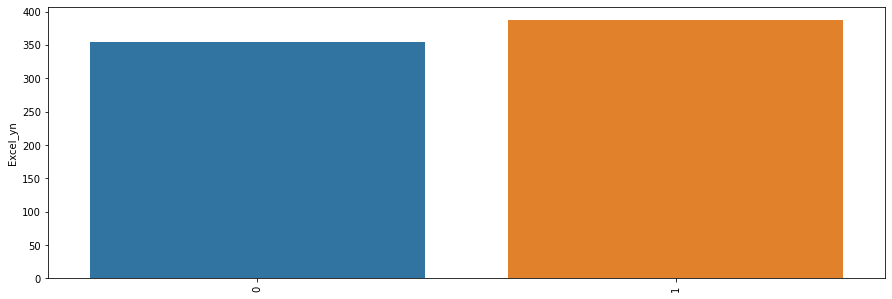

graph for Tableau_yn: total = 2


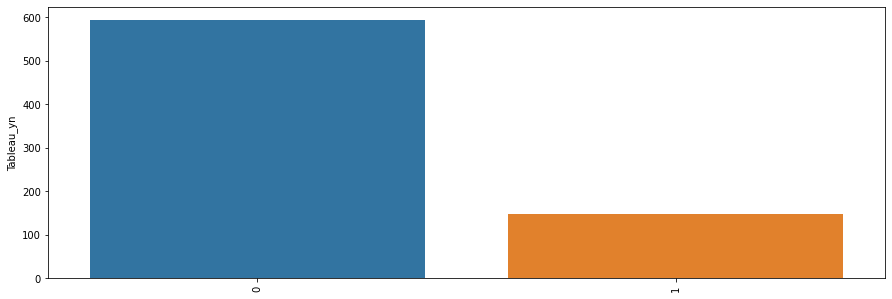

graph for Tensorflow_yn: total = 2


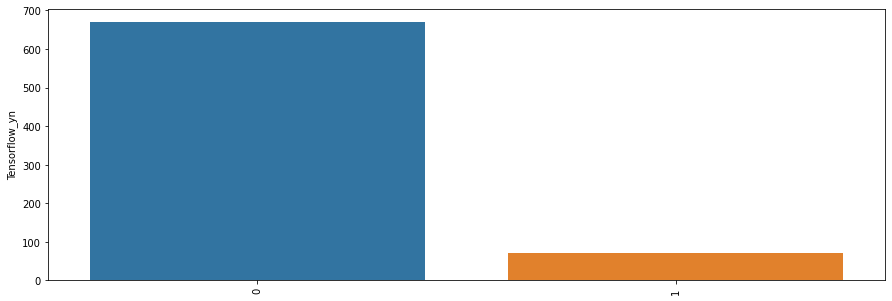

graph for Matlab_yn: total = 2


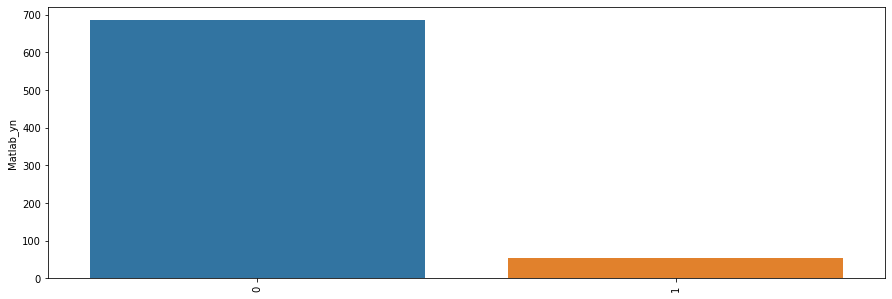

graph for Scikit_yn: total = 2


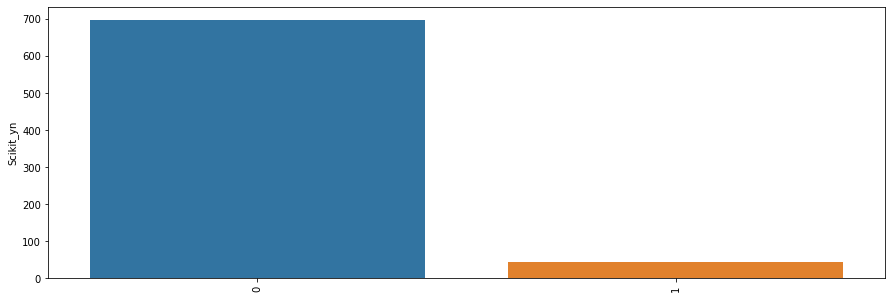

graph for Sas_yn: total = 2


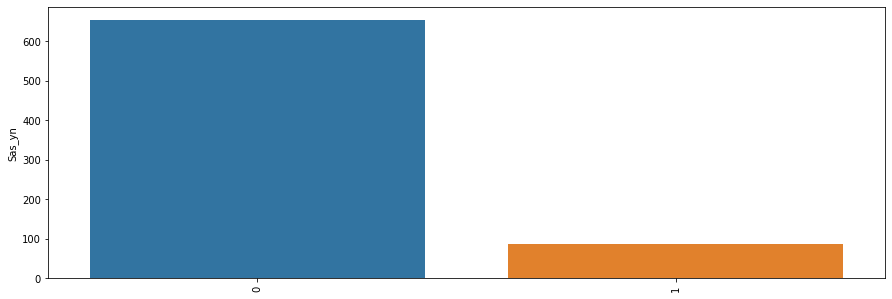

graph for job_simp: total = 7


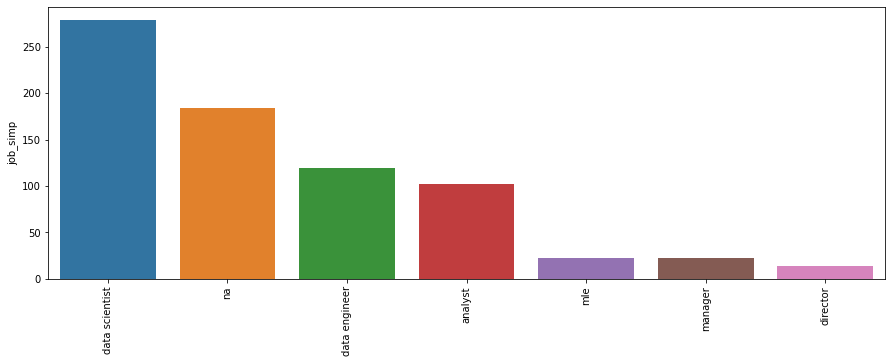

graph for seniority: total = 3


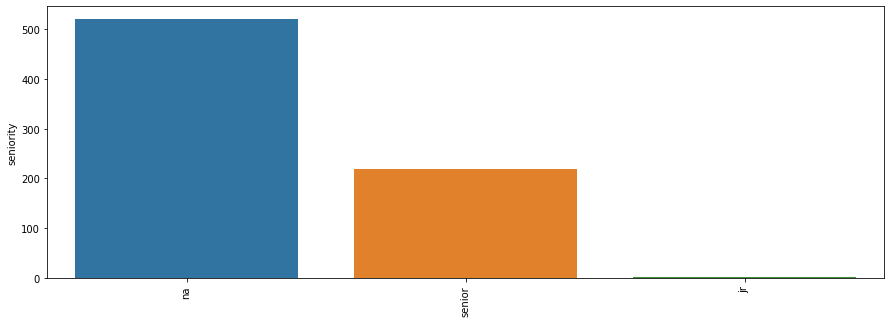

In [20]:
for i in df_cat.columns:
    fig = plt.figure(figsize=(15,5),facecolor='w') 
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 10


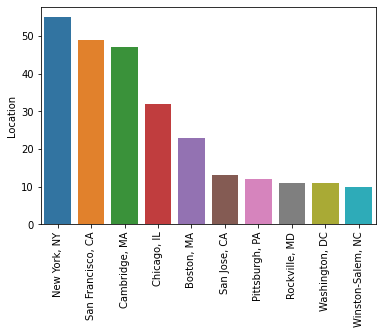

graph for Headquarters: total = 10


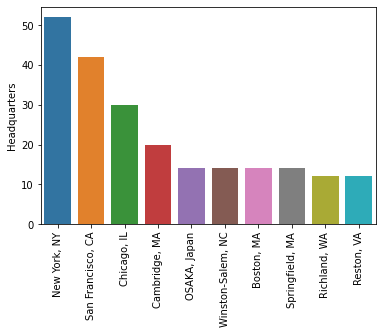

graph for company_txt: total = 10


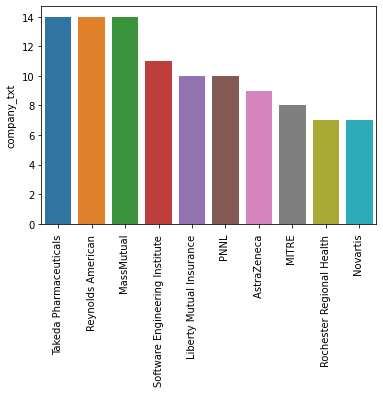

In [21]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:10]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()



In [22]:
pd.pivot_table(df, index ='job_simp',values='mean_salary')

,mean_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [23]:
pd.pivot_table(df, index = ['job_simp','seniority'],values='mean_salary')

mean_salary
job_simp       seniority             
analyst        jr           56.500000
               na           61.155405
               senior       79.092593
data engineer  na           96.701220
               senior      124.689189
data scientist jr          106.500000
               na          107.043011
               senior      138.956522
director       na          168.607143
manager        na           84.022727
mle            na          119.133333
               senior      142.071429
na             na           73.988189
               senior      109.061404

In [24]:
pd.pivot_table(df,index='job_state',values='mean_salary').sort_values('mean_salary',ascending=False)

,mean_salary
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [34]:
pd.pivot_table(df,index=['job_state','job_simp'],values='mean_salary',aggfunc='count').sort_values('job_state',ascending=True)

mean_salary
job_state job_simp                   
AL        analyst                   5
          data engineer             1
          na                        2
AZ        analyst                   1
          data engineer             5
...                               ...
WA        data scientist           17
          na                        1
WI        data scientist            3
          analyst                   3
          na                        4

[114 rows x 1 columns]

In [38]:
pd.pivot_table(df[df.job_simp=='data scientist'],index=['job_state','job_simp'],values='mean_salary').sort_values('mean_salary',ascending=False)

,,mean_salary
job_state,job_simp,
DC,data scientist,149.000000
CA,data scientist,142.522059
UT,data scientist,140.500000
MO,data scientist,127.666667
IL,data scientist,117.233333
NC,data scientist,117.000000
NY,data scientist,115.250000
MA,data scientist,113.750000
WI,data scientist,113.500000


In [39]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'mean_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python', 'python_yn', 'R_yn', 'Spark_yn', 'AWS_yn', 'Excel_yn',
       'Tableau_yn', 'Tensorflow_yn', 'Matlab_yn', 'Scikit_yn', 'Sas_yn',
       'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [48]:
df_pivots.columns

Index(['Rating', 'Industry', 'Sector', 'Revenue', 'Competitors', 'hourly',
       'employer_provided', 'python_yn', 'R_yn', 'Spark_yn', 'AWS_yn',
       'Excel_yn', 'Tableau_yn', 'Tensorflow_yn', 'Matlab_yn', 'Scikit_yn',
       'Sas_yn', 'Type of ownership'],
      dtype='object')

In [51]:
#General
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'Competitors', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'Spark_yn', 'AWS_yn', 'Excel_yn','Tableau_yn','Tensorflow_yn','Matlab_yn','Scikit_yn','Sas_yn', 'Type of ownership','mean_salary']]
for i in df_pivots.columns[:-1]:
    print (i)
    
    print(pd.pivot_table(df_pivots,index = i,values='mean_salary').sort_values('mean_salary',ascending=False))


Rating
        mean_salary
Rating             
-1.0     136.181818
 5.0     134.700000
 2.5     120.000000
 4.5     117.714286
 4.1     116.368421
 3.9     113.071429
 2.6     109.083333
 4.4     108.606061
 3.2     105.500000
 4.0     105.340426
 3.5     104.897959
 3.7     104.131148
 4.7     103.983871
 4.3     102.468750
 3.3     101.858974
 4.2     100.442308
 2.2      97.750000
 4.6      97.250000
 3.8      96.811475
 2.1      95.900000
 3.4      93.011364
 1.9      87.500000
 3.1      86.580000
 3.0      85.588235
 3.6      85.467391
 2.8      83.928571
 2.7      83.250000
 2.3      81.500000
 2.9      81.138889
 4.8      80.277778
 2.4      60.214286
Industry
                                          mean_salary
Industry                                             
Other Retail Stores                        163.500000
Motion Picture Production & Distribution   146.000000
Financial Analytics & Research             145.125000
Health, Beauty, & Fitness                  139.500000


In [57]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/juanj/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

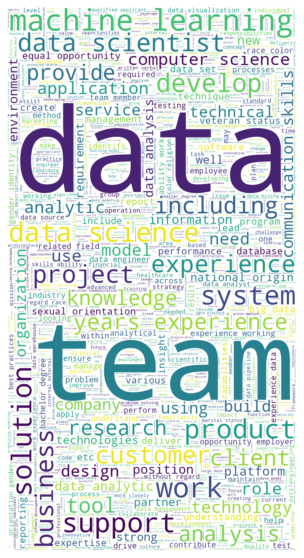

In [59]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[15,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()
